# 作業
### 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

載入相關套件

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.simplefilter('ignore')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

載入iris dataset

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape, y.shape, np.bincount(y)

((150, 4), (150,), array([50, 50, 50], dtype=int64))

設定模型估計參數

In [3]:
estermators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
               ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
               ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

資料建模並視覺化結果

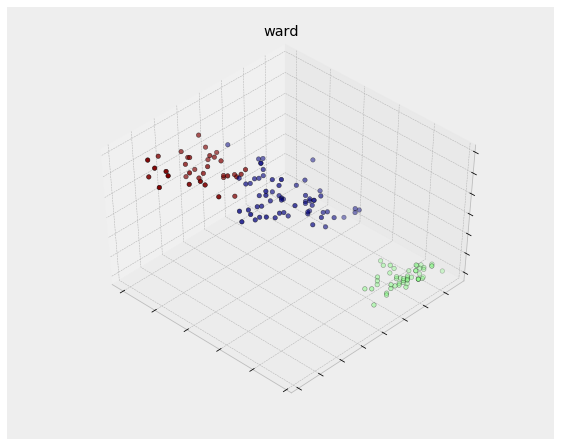

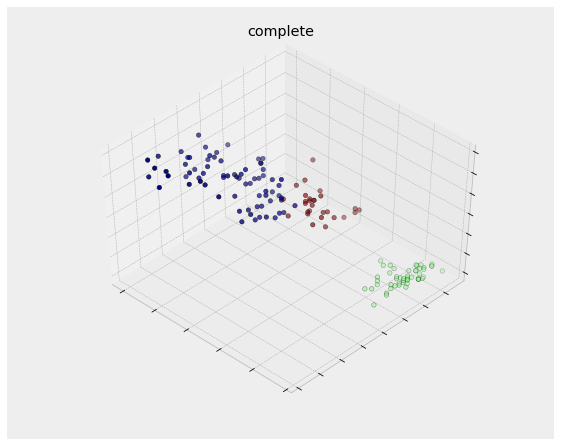

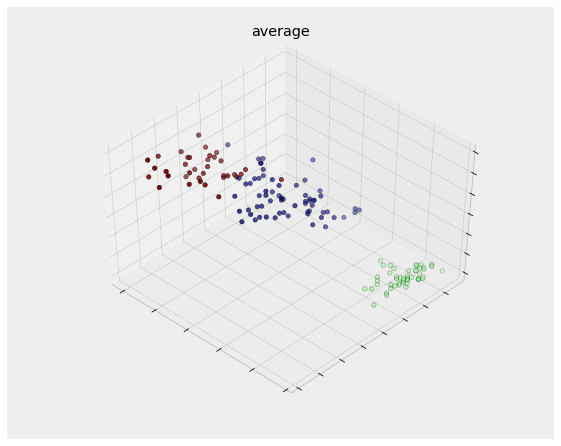

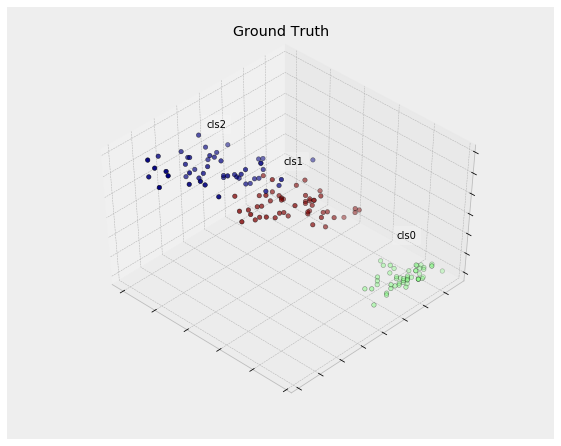

In [6]:
fignum = 1
titles = ['ward', 'complete', 'average']
for name, est in estermators:
    fig = plt.figure(fignum, figsize =(8,6))
    ax =Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)
    
    ##fit data
    est.fit(X)
    
    labels = est.labels_
    
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k', cmap=plt.cm.jet)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum-1])
    ax.dist = 12
    fignum = fignum +1
    
#plot the ground truth
fig = plt.figure(fignum, figsize = (8, 6))
ax= Axes3D(fig, rect=[0,0,.95,1],elev=48,azim=134)

for name, label in [('cls0',0),
                    ('cls1',1),
                    ('cls2',2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() +2, name,
              horizontalalignment='center',
             bbox=dict(alpha=.2, edgecolor='w',facecolor='w'))
#reorder the labels to have colors matching the cluster results
y= np.choose(y, [1,2,0]).astype(np.float)
ax.scatter(X[:,3],X[:,0],X[:,2], c=y, edgecolor='k',cmap=plt.cm.jet)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist =12

fig.show()